<b>Assignment</b>
* Assignment_Attrition

<b>Objective</b>
* Analyzing and Building models for Predicting Attrition.

<b>Dataset</b>
* The dataset, Attrition.csv, is adapted from Kaggle

<b>Work to be done</b>
1.	Write a Data Science Proposal for achieving the objective mentioned. Clearly describe the business understanding
2.	Perform exploratory analysis of the data and describe your understanding of the data.
3.	Perform data wrangling / Pre-Processing to improve outcomes E.g., missing data, normalization, discretization, etc.
4.	Is Feature Engineering required for the problem statement? Describe the technique you would adopt and justify the same
5.	Propose two feature selection techniques and compare the same
6.	Plot top 6 features that help in predicting
7.	Provide a high-level description of Machine Learning models – Logistic regression and Decision tree to predict.
8.	Compare the performance of the two classifiers – Logistic regression and Decision tree to predict.


## Business Understanding


Employee attrition is predictable under stable circumstances, wherein a set pattern can be deduced from certain parameters influencing the employee and the organization at all times. 

However, who is going to leave, when and why, can be answered based on analytical models developed as a result of data analysis.

On a basic level, the model works by clustering/ classifying employee profiles based on various attributes such as age, sex, marital status, education level, work experience, distance from hometown, etc. and generates various levels of risk of attrition. Occasionally, other parameters like performance over the years, pay raise, work batch, educational institution are also taken into consideration.

However, the accuracy of the model is directly proportional to the selection of parameters, which in turn, leads to the generation of the ‘type’ of predictive model most suitable for the organisation.

For instance, ‘logistic model’ produces scorecards for employees based on their predicted ‘attrition risk’ parameters; Likewise, ‘decision trees’ model evaluate loss based on factors like gini index, information gain and variation reduction. 

<b>Methodology:</b>

* EDA: Perform exploratory analysis of the data
* Preprocessing the collected data: Perform data wrangling / Pre-Processing to improve outcomes
* Analyzing the dataset: The most important features that push an employee to leave the organization are detected
* Balancing the dataset: Since the dataset is not already balanced, it is necessary to be equalized
* Building the predictive model: The suitable configuration for the model is selected to increase the prediction accuracy (Logistic regression and Decision tree to predict)
* Validating the model: Compare the performance of the two classifiers – Logistic regression and Decision tree to predict

Predictive Attrition Model helps in not only taking preventive measures but also into making better hiring decisions.


<b>Import the required libraries</b>

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#preprocess.
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

#model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
pd.set_option('display.max_columns',None)

warnings.filterwarnings('ignore')

</b>Read the uploaded 'Final dataset Attrition-1.csv' as dataframe </b>

In [2]:
df = pd.read_csv('Final dataset Attrition-1.csv')

#### Analysing the dataset

Print the shape, null check and datapoints

In [3]:
print("There are {:,} rows and {} columns in the data.".format(df.shape[0], df.shape[1]))
print("There are {} missing values in the data.".format(df.isnull().sum().sum()))
df.head()

There are 1,470 rows and 33 columns in the data.
There are 2940 missing values in the data.


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,21-01-2021,NaN,Salary,OFFICE,4,2,No,Job Event,Contract,NaN
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,13-03-2021,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time,NaN
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,23-01-2021,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract,NaN
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,25-04-2021,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime,NaN
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,14-06-2021,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract,NaN


#### Getting information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   BusinessTravel           1470 non-null   object 
 3   Department               1470 non-null   object 
 4   DistanceFromHome         1470 non-null   int64  
 5   Gender                   1470 non-null   object 
 6   JobInvolvement           1470 non-null   int64  
 7   JobLevel                 1470 non-null   int64  
 8   JobRole                  1470 non-null   object 
 9   JobSatisfaction          1470 non-null   int64  
 10  MaritalStatus            1470 non-null   object 
 11  MonthlyIncome            1470 non-null   int64  
 12  NumCompaniesWorked       1470 non-null   int64  
 13  OverTime                 1470 non-null   object 
 14  PercentSalaryHike       

Variables type:

Numeric variables:
Related to personal information: Age, DistanceFromHome
Related to income: MonthlyIncome, PercentSalaryHike, StockOptionLevel
Related to time in company: TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager
other: JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, TrainingTimesLastYear, Leaves, Absenteeism
Categorical variables:
Binary variables: attrition(target variable), gender, OverTime, Mode_of_work, Work_accident, Job_mode
Nominal variables: Department, Higher_Education, JobRole, MaritalStatus
Ordinal variables:
Ordinal regarding satisfaction and performance : JobInvolvement, JobSatisfaction, PerformanceRating, Work_accident, Leaves, BusinessTravel, JobLevel, StockOptionLevel


In [5]:
df.describe()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Date_of_termination,Leaves,Absenteeism,Unnamed: 32
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,0.0,1470.000000,1470.000000,0.0
mean,36.923810,9.192517,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,0.793878,11.279592,2.799320,7.008163,2.187755,4.123129,NaN,2.568707,1.525170,NaN
std,9.135373,8.106864,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,0.852077,7.780782,1.289271,6.126525,3.222430,3.568136,NaN,1.716171,1.097856,NaN
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,30.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,NaN,1.000000,1.000000,NaN
50%,36.000000,7.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,NaN,3.000000,2.000000,NaN
75%,43.000000,14.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,NaN,4.000000,2.000000,NaN
max,60.000000,29.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,NaN,5.000000,3.000000,NaN


#### Summary Statistics of categorical variables

In [6]:
cat_cols=df.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(df[cat_cols].melt(var_name='column_name', value_name='value_count').value_counts())\
    .rename(columns={0: 'count'})\
    .sort_values(by=['column_name', 'count'])
#display(df.select_dtypes(include=object).describe())
display(cat_df)

count
column_name       value_count             
Attrition         Yes                  237
                  No                  1233
BusinessTravel    Non-Travel           150
                  Travel_Frequently    277
                  Travel_Rarely       1043
...                                    ...
Status_of_leaving Work Environment     290
                  Salary               297
                  Dept.Head            314
Work_accident     Yes                  734
                  No                   736

[1156 rows x 1 columns]

### Preprocessing
   * Remove unneeded features 
   * Feature Detection
   * Detecting Outliers
   * Preparing Dataset
   * Transform some of the binary variables into a 1/0 format.
   

Finding Columns having only one Unique Values and drop them

In [7]:
redundant_cols = list()

for col in df.columns:
    if len(df[col].unique()) == 1:
        redundant_cols.append(col)

redundant_cols

['Date_of_termination', 'Unnamed: 32']

In [8]:
df.drop(redundant_cols, axis=1, inplace=True)

In [9]:
df.shape

(1470, 31)

### Feature engineering and selection

The feature Selection is one of the main steps of the preprocessing phase as the features which we choose directly effects the model performance. While some of the features seem to be less useful in terms of the context; others seem to equally useful. The better features we use the better our model will perform.

We can also use the Recusrive Feature Elimination technique (a wrapper method) to choose the desired number of most important features. The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

We can use it directly from the scikit library by importing the RFE module or function provided by the scikit. But note that since it tries different combinations or the subset of features;it is quite computationally expensive.

In [10]:
df.drop(['BusinessTravel', 'NumCompaniesWorked', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

#### Plotting the Features against the top 'Target' variable.

<b>1. Age</b>

An Age is a continuous quantity and therefore we can plot it against the Attrition using a boxplot.

In [11]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

<Axes: >

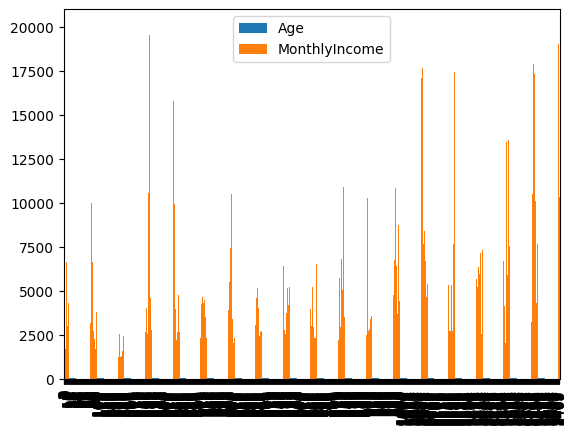

In [12]:
df[['Age','MonthlyIncome']].plot(kind='bar')

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

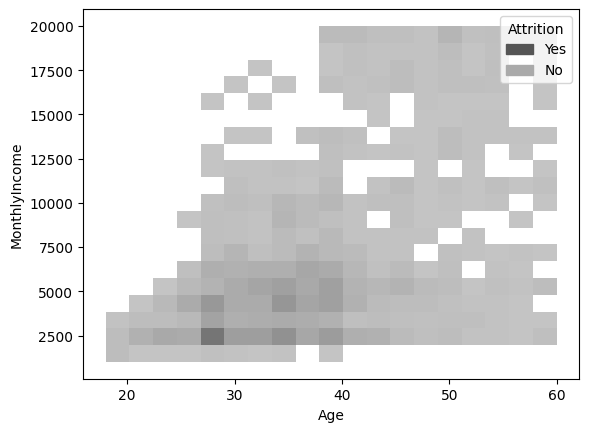

In [13]:
sns.histplot(data=df,y='MonthlyIncome',x='Age',hue='Attrition', palette ='gray')

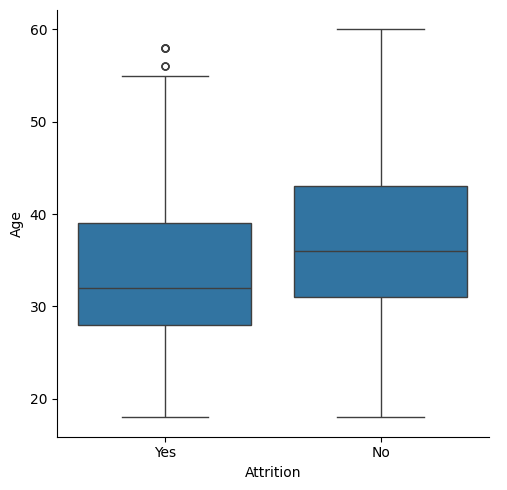

In [14]:
sns.catplot(data=df,y='Age',x='Attrition',kind='box')

The median as well the maximum age of the peole with '0' attrition is higher than that of the '1' category. This shows that peole with higher age have lesser tendency to leave the organisation which makes sense as they may have settled in the organisation.

<b>2. Job Level</b>

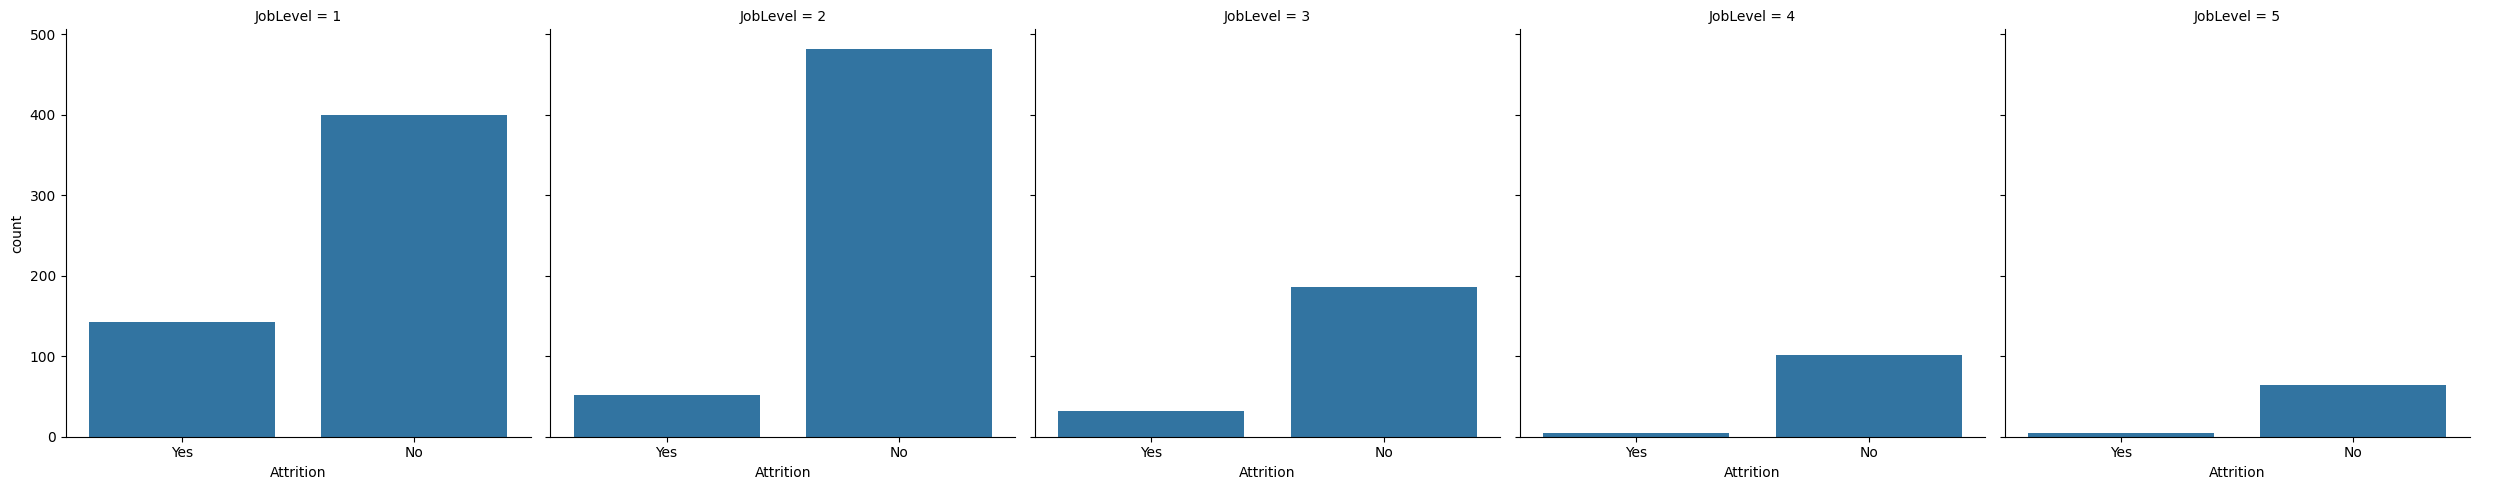

In [15]:
sns.catplot(data=df,kind='count',x='Attrition',col='JobLevel')

In [16]:
pd.crosstab(columns=[df.Attrition],index=[df.JobLevel],margins=True,normalize='index') 

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


People in Joblevel 4 have a very high percent for a '0' and a low percent for a '1'.

<b>3. Monthly Income</b>

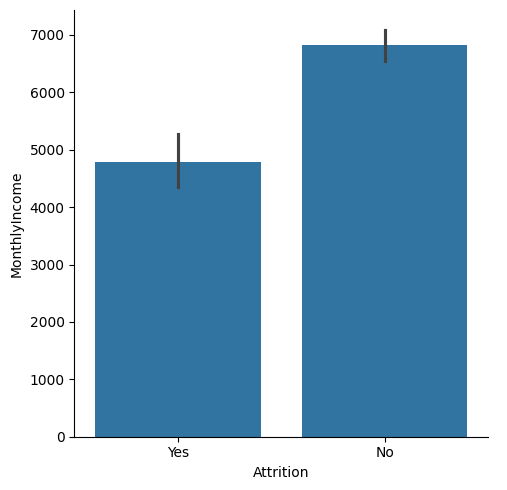

In [17]:
sns.catplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')

The average income for '0' class is quite higher and it is obvious as those earning well will certainly not be willing to exit the organisation. Similarly those employees who are probably not earning well will certainly want to change the company.

<b>4. Job Satisfaction</b>

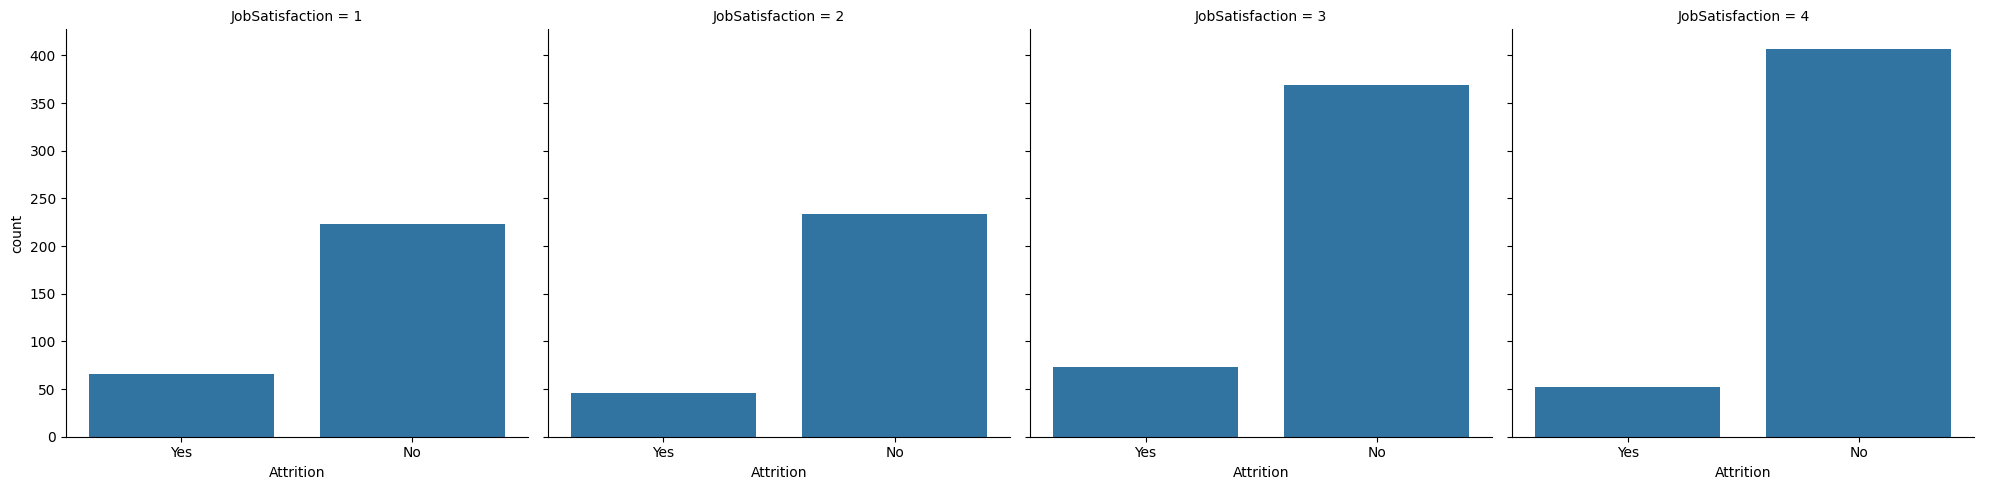

In [18]:
sns.catplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')

In [19]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


The above plot shows an interesting trend. For higher values of job satisfaction( ie more a person is satisfied with his job) lesser percent of them say a '1' which is quite obvious as highly contented workers will obvioulsy not like to leave the organisation.

<b>5. Salary Hike </b>

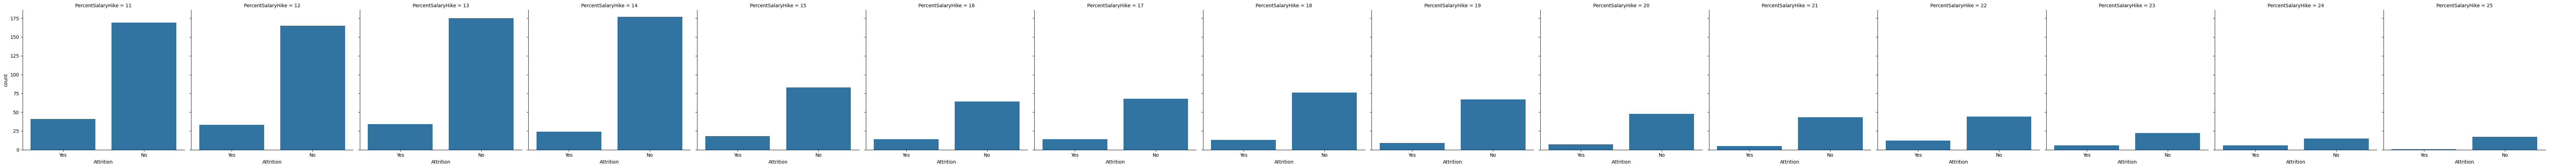

In [20]:
sns.catplot(data=df,kind='count',x='Attrition',col='PercentSalaryHike')

In [21]:
pd.crosstab(columns=[df.Attrition],index=[df.PercentSalaryHike],margins=True,normalize='index')

Attrition,No,Yes
PercentSalaryHike,,
11,0.804762,0.195238
12,0.833333,0.166667
13,0.837321,0.162679
14,0.880597,0.119403
15,0.821782,0.178218
16,0.820513,0.179487
17,0.829268,0.170732
18,0.853933,0.146067
19,0.881579,0.118421


From the above, the hike between 11 and 18 having very high percent for a '0' and a low percent for a '1'.

<b>6. Performance Rating</b>

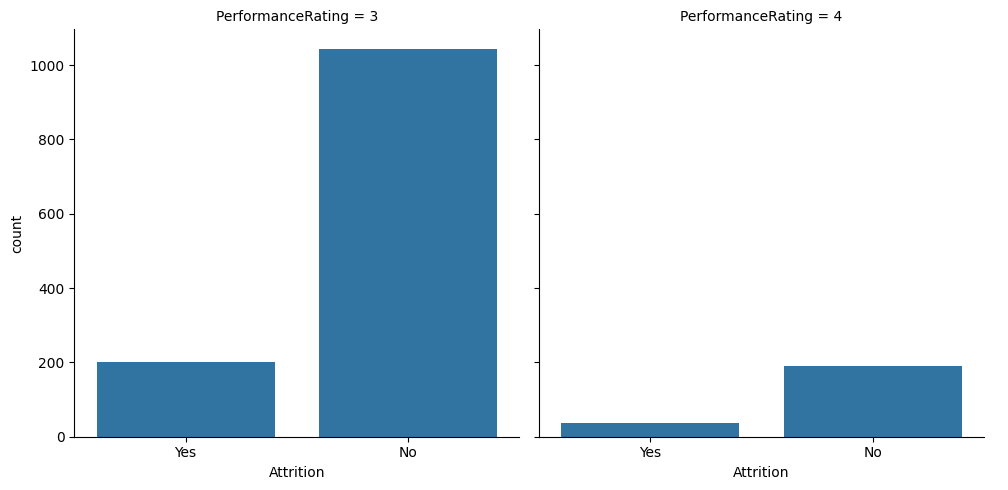

In [22]:
sns.catplot(data=df,kind='count',x='Attrition',col='PerformanceRating')

In [23]:
pd.crosstab(columns=[df.Attrition],index=[df.PerformanceRating],margins=True,normalize='index')

Attrition,No,Yes
PerformanceRating,,
3,0.839228,0.160772
4,0.836283,0.163717
All,0.838776,0.161224


From the above, both rating having same attrition.

#### Outliers Detection

In [25]:
tar_cols=df.select_dtypes(exclude=object).columns.tolist()
tar_cols

['Age',
 'DistanceFromHome',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'PercentSalaryHike',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Leaves',
 'Absenteeism']

<Axes: >

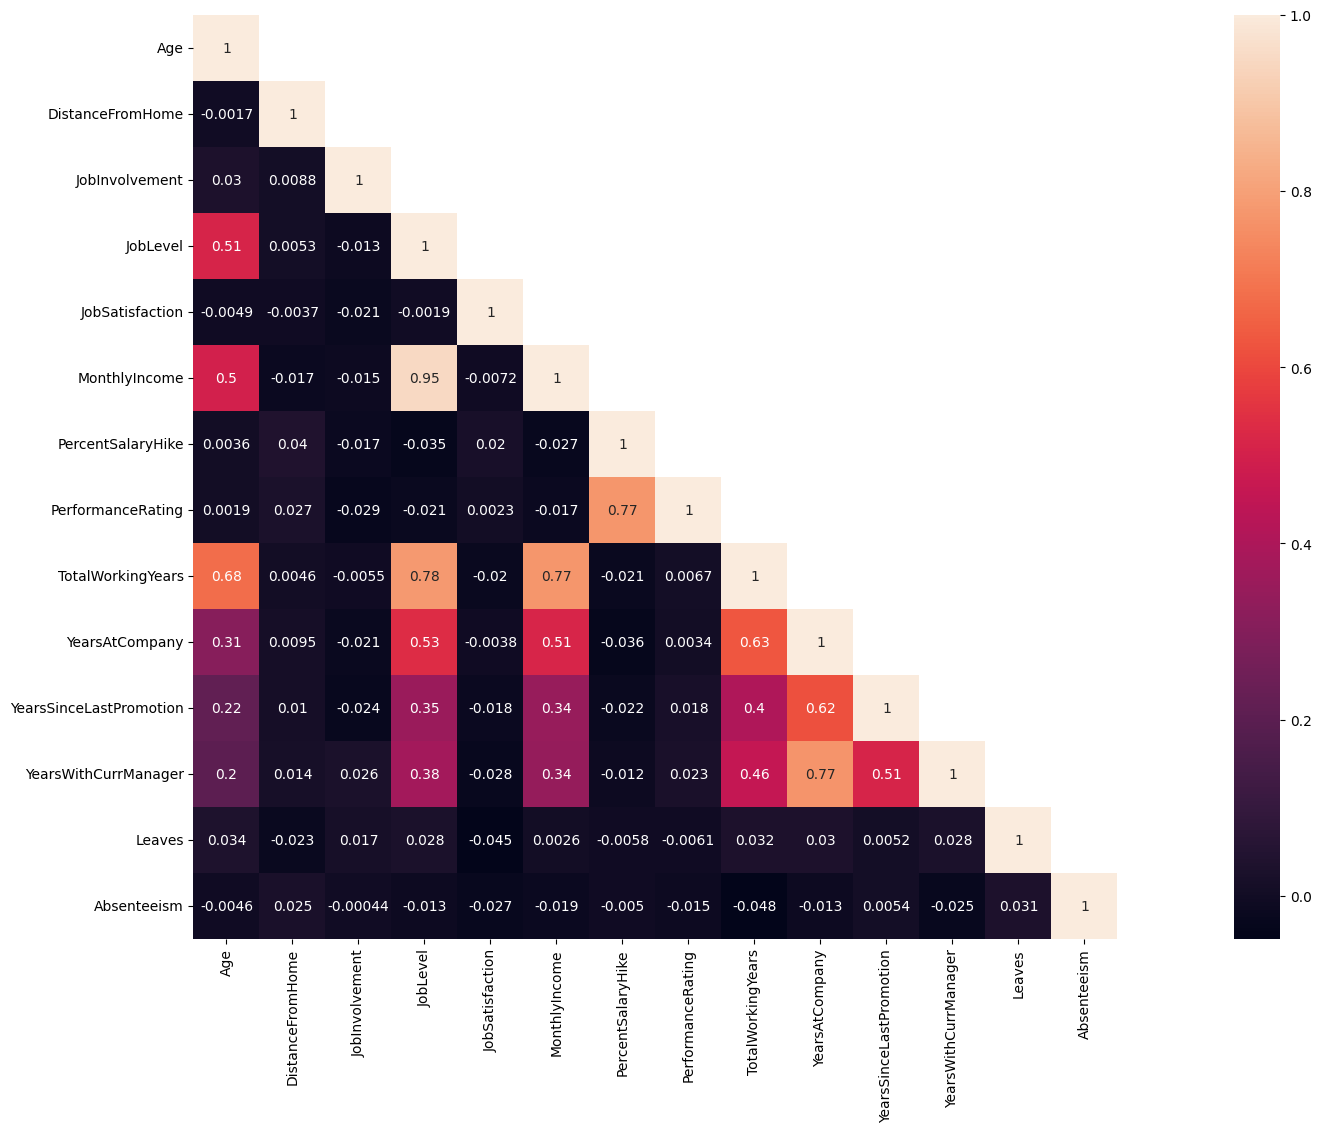

In [30]:
#corelation matrix.
cor_mat= df[tar_cols].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

<b>SOME INFERENCES FROM THE ABOVE HEATMAP</b>

1. Self relation ie of a feature to itself is equal to 1 as expected.

2. JobLevel is highly related to Age as expected as aged employees will generally tend to occupy higher positions in the company.

3. MonthlyIncome is very strongly related to joblevel as expected as senior employees will definately earn more.

4. PerformanceRating is highly related to PercentSalaryHike which is quite obvious.

5. Also note that TotalWorkingYears is highly related to JobLevel which is expected as senior employees must have worked for a larger span of time.

6. YearsWithCurrManager is highly related to YearsAtCompany.


Note that we can drop some highly corelated features as they add redundancy to the model but since the corelation is very less in genral let us keep all the features for now. In case of highly corelated features we can use something like Principal Component Analysis(PCA) to reduce our feature space.

In [31]:
def detect_outliers(data, col):
    Q1 = np.nanpercentile(data[col], 25, interpolation= 'midpoint')
    Q3 = np.nanpercentile(data[col], 75, interpolation= 'midpoint')
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    ls = df.index[(data[col] < lower_bound) | (data[col] > upper_bound)]

    return ls

Getting a feature list of int64 data type

In [32]:
features_lst = list()
for col in df.columns:
    if df[col].dtype == 'int64':
        features_lst.append(col)

features_lst  

['Age',
 'DistanceFromHome',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'PercentSalaryHike',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Leaves',
 'Absenteeism']

In [33]:
for col_name in features_lst:
    if len(detect_outliers(df, col_name)) != 0:
        print(col_name)

MonthlyIncome
PerformanceRating
TotalWorkingYears
YearsAtCompany
YearsSinceLastPromotion
YearsWithCurrManager


C:\Users\Vimalkumar\AppData\Local\Temp\ipykernel_16576\2514010062.py:2: DeprecationWarning: the `interpolation=` argument to nanpercentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  if len(detect_outliers(df, col_name)) != 0:


Text(0, 0.5, 'Total Working Years')

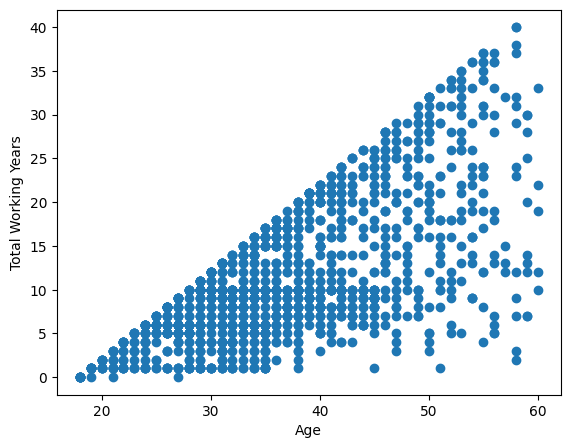

In [34]:
plt.figure(figsize=(6.5,5))
plt.scatter(df.Age, df.TotalWorkingYears, )
plt.xlabel('Age')
plt.ylabel('Total Working Years')

Text(0, 0.5, 'Total Working Years')

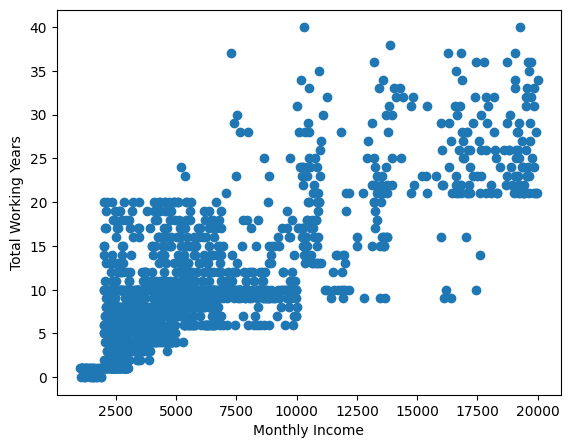

In [35]:

plt.figure(figsize=(6.5,5))
plt.scatter(df.MonthlyIncome, df.TotalWorkingYears, )
plt.xlabel('Monthly Income')
plt.ylabel('Total Working Years')

Text(0, 0.5, 'Monthly Income')

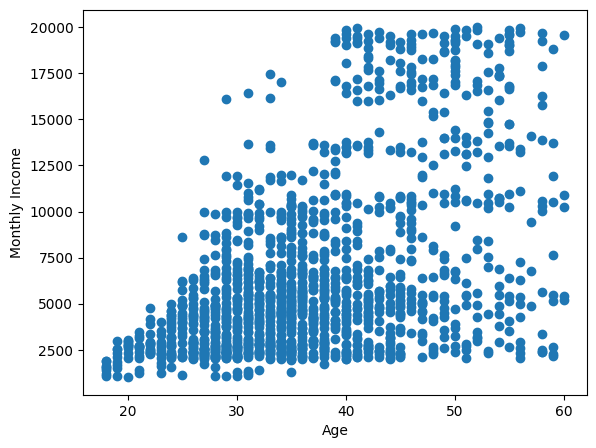

In [36]:
plt.figure(figsize=(6.5,5))
plt.scatter(df.Age, df.MonthlyIncome,)
plt.xlabel('Age')
plt.ylabel('Monthly Income')

Text(0, 0.5, 'Monthly Income')

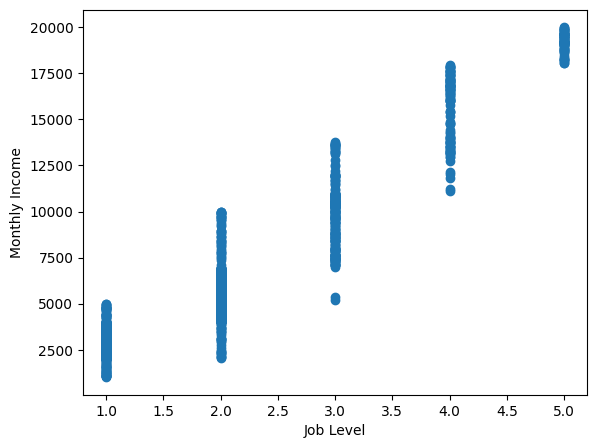

In [37]:
plt.figure(figsize=(6.5,5))
plt.scatter(df.JobLevel, df.MonthlyIncome,)
plt.xlabel('Job Level')
plt.ylabel('Monthly Income')

In [38]:
df['JobLevel'].corr(df['MonthlyIncome'])

0.9502999134798454

As the correlation between the two columns is very high, we can simply drop one column

#### Remove collinear features

In [40]:
# Threshold for removing correlated variables
threshold = 0.8

# Absolute value correlation matrix
corr_matrix = df[features_lst].corr().abs()
corr_matrix.head()


,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Leaves,Absenteeism
Age,1.000000,0.001686,0.029820,0.509604,0.004892,0.497855,0.003634,0.001904,0.680381,0.311309,0.216513,0.202089,0.033811,0.004628
DistanceFromHome,0.001686,1.000000,0.008783,0.005303,0.003669,0.017014,0.040235,0.027110,0.004628,0.009508,0.010029,0.014406,0.022749,0.024581
JobInvolvement,0.029820,0.008783,1.000000,0.012630,0.021476,0.015271,0.017205,0.029071,0.005533,0.021355,0.024184,0.025976,0.016599,0.000442
JobLevel,0.509604,0.005303,0.012630,1.000000,0.001944,0.950300,0.034730,0.021222,0.782208,0.534739,0.353885,0.375281,0.028144,0.013089
JobSatisfaction,0.004892,0.003669,0.021476,0.001944,1.000000,0.007157,0.020002,0.002297,0.020185,0.003803,0.018214,0.027656,0.044989,0.027244


In [45]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
upper.head()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Leaves,Absenteeism
Age,NaN,0.001686,0.029820,0.509604,0.004892,0.497855,0.003634,0.001904,0.680381,0.311309,0.216513,0.202089,0.033811,0.004628
DistanceFromHome,NaN,NaN,0.008783,0.005303,0.003669,0.017014,0.040235,0.027110,0.004628,0.009508,0.010029,0.014406,0.022749,0.024581
JobInvolvement,NaN,NaN,NaN,0.012630,0.021476,0.015271,0.017205,0.029071,0.005533,0.021355,0.024184,0.025976,0.016599,0.000442
JobLevel,NaN,NaN,NaN,NaN,0.001944,0.950300,0.034730,0.021222,0.782208,0.534739,0.353885,0.375281,0.028144,0.013089
JobSatisfaction,NaN,NaN,NaN,NaN,NaN,0.007157,0.020002,0.002297,0.020185,0.003803,0.018214,0.027656,0.044989,0.027244


In [46]:

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove :' % (len(to_drop)))


There are 1 columns to remove :


In [ ]:
to_drop

In [47]:
df = df.drop(columns = to_drop)
df.head()

,Age,Attrition,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,...,YearsWithCurrManager,Higher_Education,Date_of_Hire,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,Yes,Research & Development,2,Male,2,1,Laboratory Technician,3,Single,...,0,Graduation,21-01-2021,Salary,OFFICE,4,2,No,Job Event,Contract
1,21,No,Research & Development,15,Male,3,1,Research Scientist,4,Single,...,0,Graduation,13-03-2021,Work Accident,WFH,5,2,No,Recruiter,Part Time
2,45,No,Research & Development,6,Male,3,3,Research Director,1,Married,...,0,Post-Graduation,23-01-2021,Dept.Head,WFH,1,3,No,Job Event,Contract
3,23,No,Sales,2,Male,3,1,Sales Representative,1,Divorced,...,0,PHD,25-04-2021,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime
4,22,No,Research & Development,15,Female,3,1,Laboratory Technician,4,Single,...,0,PHD,14-06-2021,Better Opportunity,WFH,5,2,No,Job Event,Contract


### Preparing Dataset

Before feeding our data into a ML model we first need to prepare the data. This includes encoding all the categorical features (either LabelEncoding or the OneHotEncoding) as the model expects the features to be in numerical form. 

<b>Feature Encoding</b>

In [ ]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)
    

In [ ]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

In [ ]:
for col in cat_df.columns:
    transform(col)

In [ ]:
df.head()

<b>Feature Selection</b>

In [ ]:
X=df.drop('Attrition',axis=1)
Y=df['Attrition']

<b>Splitting the data into training and validation sets</b>

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print("Training split input- ", x_train.shape)
print("Testing split input- ", x_test.shape)

### High-level description of Machine Learning models – Logistic regression and Decision tree to predict

<b>Logistic regression</b> is used to predict the class (or category) of individuals based on one or multiple predictor variables (x). It is used to model a binary outcome, that is a variable, which can have only two possible values: 0 or 1, yes or no.

In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:

Logit(pi) = 1/(1+ exp(-pi))

ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k


<b>Decision trees</b> tend to be the method of choice for predictive modeling because they are relatively easy to understand and are also very effective. The basic goal of a decision tree is to split a population of data into smaller segments. There are two stages to prediction. The first stage is training the model—this is where the tree is built, tested, and optimized by using an existing collection of data. In the second stage, you actually use the model to predict an unknown outcome

A decision tree is a commonly used classification model, which is a flowchart-like tree structure. In a decision tree, each internal node (non-leaf node) denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (or terminal node) holds a class label. The topmost node in a tree is the root node. 



### Logistic regression 

For better performance we will do the <b>feature scaling</b> ie bringing all the features onto the same scale by using the StandardScaler provided in the scikit library.

In [ ]:
scaler = MinMaxScaler(copy = True)
Unscaled_x = scaler.fit_transform(x_train)

x_scaled = pd.DataFrame(Unscaled_x)
x_scaled

In [ ]:
Unscaled_x_test = scaler.fit_transform(x_test)

x_test_scaled = pd.DataFrame(Unscaled_x_test)
x_test_scaled

In [ ]:
lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(x_scaled, y_train)
y_pred = lr.predict(x_test_scaled)
report = classification_report(
                        digits= 6,
                        y_true= y_test, 
                        y_pred= y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test, normalize=True, sample_weight=None)*100,2))
print(report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

lrScore = lr.score(x_test,y_test)

We have applied logistic model to the data getting an accuracy of 86.05%. As it is clear from our model that we are getting low value of recall for true value of attrition ,i.e., we are not getting enough of the relevant information from the data. The retrieved model shows high senstivity but low specifity.

Now ,we will try a new model with few less relevant features trimmed out from our dataset.

<b>Applying Recursive Feature Elimination (RFE) for feature selection</b>

In [ ]:
rfe = RFE(lr)
rfe = rfe.fit(x_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

Transforming our data to desired no. of features

In [ ]:
X =rfe.transform(X)
X.shape

Calculating accuracy of our modified model

In [ ]:
x_test = rfe.transform(x_test)
x_test.shape

In [ ]:
# Fit the model on the trainng data.
lr.fit(x, Y)
y_pred = lr.predict(x_test)
report = classification_report(
                        digits= 6,
                        y_true= y_test, 
                        y_pred= y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test, normalize=True, sample_weight=None)*100,2))
print(report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

lrScore = lr.score(x_test,y_test)

After applying Recursive Feature Elimination (RFE) for feature selection, there is no inprovement in accuracy.

### Decision Tree

Without apply feature scaling for decision trees

In [ ]:
X=df.drop('Attrition',axis=1)
Y=df['Attrition']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print("Training split input- ", x_train.shape)
print("Testing split input- ", x_test.shape)

In [ ]:
dtree = DecisionTreeClassifier()

def applyDecisionTree(X_train, y_train, X_test, y_test):
    # Defining the decision tree algorithm
    dtree.fit(X_train, y_train)
    
    score = dtree.score(X_test,y_test)
    rounded_score = round(score * 100, 2)
    print("Accuracy=" , rounded_score)
    
    # Predicting the values of test data
    y_pred = dtree.predict(X_test)
    print("Classification report - \n", classification_report(y_test,y_pred))

In [ ]:
applyDecisionTree(x_train, y_train, x_test, y_test)
dtScore = dtree.score(x_test,y_test)


Although overall accuracy of classification is good. Precision and accuracy of class 1 is very low indicating Class Label Imbalance.

#### Class Imbalance Check

In [ ]:
# Printing the dataset shape
print ("Dataset Length: ", len(X))
print ("Dataset Shape: ", X.shape)


In [ ]:
df.Attrition.value_counts()/1470

About 84 % of data are of class label 0 and only 16 % of data are of class label 1. This creates Class Imbalance. It is necessary to remove because even if we create a classifier which everytime predicts Attrition as 'No' will also achieve an overall accuracy of 84%, which is meaningless.

#### Method 1: UNDERSAMPLING

In [ ]:
# Class count
count_class_0, count_class_1 = df.Attrition.value_counts()

# Divide by class
df_class_0 = df[df['Attrition'] == 0]
df_class_1 = df[df['Attrition'] == 1]

print ("df_class_0 Shape: ", df_class_0.shape)
print ("df_class_1 Shape: ", df_class_1.shape)


In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis= 0)

print('Random under-sampling:')
print(df_under.Attrition.value_counts())

In [ ]:
X = df_under.drop('Attrition',axis=1)
Y = df_under['Attrition']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

In [ ]:
applyDecisionTree(x_train, y_train, x_test, y_test)
dtScore = dtree.score(x_test,y_test)

After Undersampling, f1-score for minority class 1 improved. Precision and Recall also got improved. Score for class 0 reduced but that's ok. We have more generalized classifier which classifies both classes with similar prediction score.

#### Method 2: OVERSAMPLING

In [ ]:
df_class_1.sample(count_class_0, replace=True).shape

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True) 

In [ ]:
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)
print('Random over-sampling:')
print(df_over.Attrition.value_counts())

In [ ]:
X = df_over.drop('Attrition', axis=1)
Y = df_over['Attrition']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
y_train.value_counts()

In [ ]:
applyDecisionTree(x_train, y_train, x_test, y_test)
dtScore = dtree.score(x_test,y_test)

After Over-sampling, f1-score for minority class 1 improved to a great extent. Precision and Recall also got improved significantly. Score for class 0 is also not reduced here. We have more generalized classifier which classifies both classes with similar prediction score. Overall accuracy got improved

Overall accuracy is increased and precision and recall is also improved. We will now use the OVERSAMPLING sampled X and Y to predict for further models.

### Compare the performance of the two classifiers 

#### Model Scores (accuracy)

In [ ]:
model_scores={'Logistic Regression':lrScore,
              'Decision tree':dtScore
             }
model_scores

#### Model Comparison
Based on the accuracy

In [ ]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

we can see that Decision tree is having the best accuracy over Logistic regression.

#### Visualize the accuracy of each model

In [ ]:
model_compare.T.plot(kind='bar')

#### Conclusions

We can see that Decision tree has ~6% better accuracy than Logistic regression but Decision tree is an Oversampling model hence we will select Logistic regression.